# Day 4 - Graphene!

Today we are going to apply what we have learned and explore the electronic structure of graphene.

In this morning session,
- write script to perform scf calculation for graphene
    - calculate the band structure
    - calculate the density of states
- post processing!
    - plot results

## DFTK.jl

**Goal**: Write a script that take as input:

   - lattice,
   - atomic positions,
   - input parameters (Ecut, kgrid, etc.)

In [1]:
# load dependencies
using Dates
using DFTK
using Plots

```julia
function run(lattice, atoms; extras)
    # setup of the DFT calculation

    # call self_consistent_field
    
    return scfres
end
```

In [2]:
# a simple solution
function run(lattice, atoms; Ecut=20, kgrid=[20, 20, 1], tol=1e-10, 
        smearing=Smearing.Gaussian(), temperature=0.01)
    @info "Building DFT model"
    model = model_LDA(lattice, atoms, smearing=smearing, temperature=temperature)
    @info "Constructing plane-wave basis set"
    basis = PlaneWaveBasis(model, Ecut; kgrid=kgrid)
    @info "Solving Kohn-Sham equations self-consistently"
    println()
    println("Starting calculation at $(Dates.now())")
    println()
    println("no. of electrons    = $(model.n_electrons)")
    println("k grid              = $(kgrid)")
    println("temperature         = $(temperature)")
    println("Ecut                = $(Ecut)")
    @time scfres = self_consistent_field(basis; tol=tol)
    println()
    println("Finished calculation at $(Dates.now())")
    println()
    return basis, scfres
end;

In [4]:
a = 4.6111
c = 18.87
lattice = [[a -0.5*a 0]; [0 0.5*sqrt(3)*a 0]; [0 0 c]];

In [5]:
positions = [[1/3., 2/3., 0], [2/3., 1/3., 0]];

In [6]:
C = ElementPsp(:C, psp=load_psp(:C, functional="lda"));
atoms = [C => [pos for pos in positions]];

In [7]:
basis, scfres = run(lattice, atoms);

┌ Info: Building DFT model
└ @ Main In[2]:4
┌ Info: Constructing plane-wave basis set
└ @ Main In[2]:6



Starting calculation at 2021-06-24T13:48:15.026

no. of electrons    = 8
k grid              = [20, 20, 1]


┌ Info: Solving Kohn-Sham equations self-consistently
└ @ Main In[2]:8


temperature         = 0.01
Ecut                = 20
n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -11.28740916631         NaN   2.62e-01    3.3 
  2   -11.29632790929   -8.92e-03   3.78e-02    2.2 
  3   -11.29693383682   -6.06e-04   8.06e-03    2.6 
  4   -11.29696954831   -3.57e-05   7.77e-04    2.7 
  5   -11.29697039150   -8.43e-07   1.23e-04    3.8 
  6   -11.29697040825   -1.67e-08   1.34e-05    3.3 
  7   -11.29697040848   -2.30e-10   1.63e-06    3.6 
  8   -11.29697040848   -2.57e-12   1.30e-07    3.6 
131.293806 seconds (113.55 M allocations: 18.183 GiB, 3.12% gc time)

Finished calculation at 2021-06-24T13:50:26.611



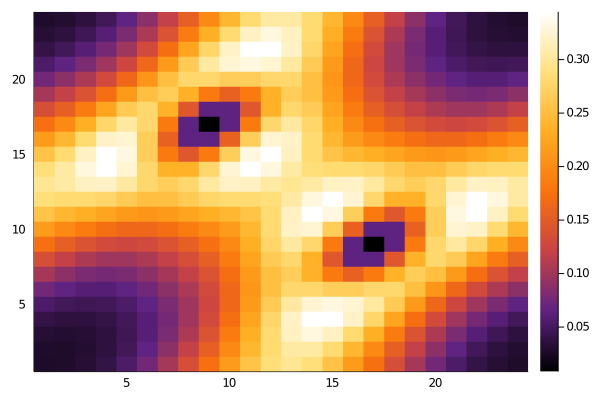

In [13]:
ρ = heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)

Computing bands along kpath:
       Γ -> M -> K -> Γ -> A -> L -> H -> A  and  L -> M  and  K -> H


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:24


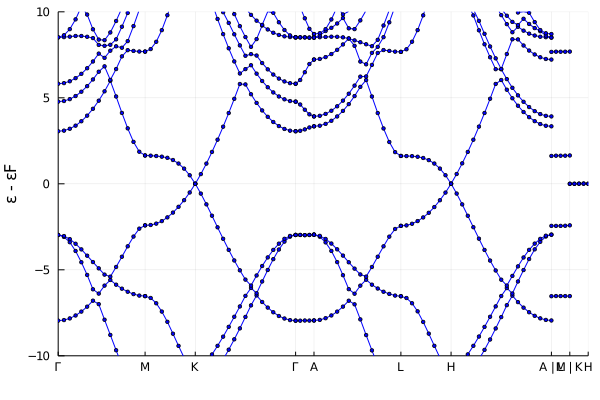

In [14]:
bands = plot_bandstructure(scfres, kline_density=10)
plot!(bands, xlabel = " ", ylabel="ε - εF", ylims=(-10, 10))

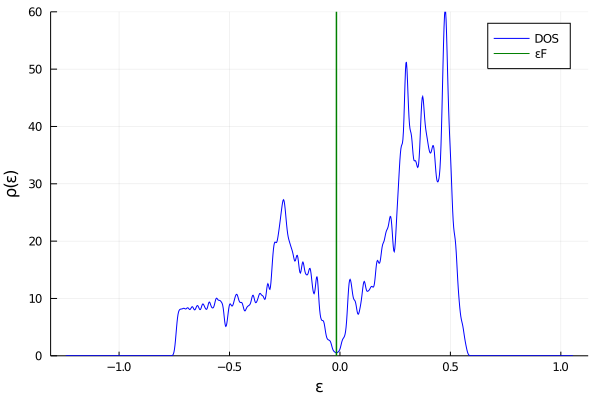

In [15]:
dos = plot_dos(scfres)
plot!(dos, xlabel="ε", ylabel="ρ(ε)", ylim=(0, 60))

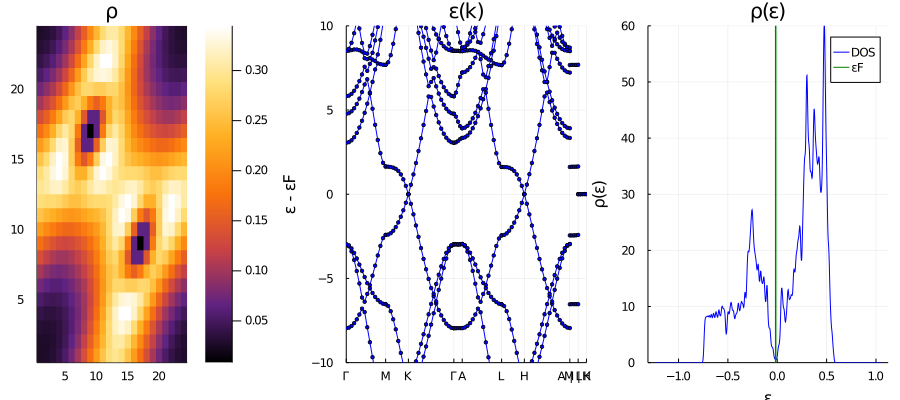

In [16]:
summary = plot(ρ, bands, dos, layout = (1, 3), size=(900, 400), title=["ρ" "ε(k)" "ρ(ε)"])